# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [28]:
# Codewrite cell (Use as you wish)

# Load the dataset
data_A = np.load('../../Data/Dataset_A.npy')

# Define the number of clusters and gamma for the RBF kernel
from scipy.sparse import csgraph
n_clusters = 2  # Example: 2 clusters
from scipy.spatial.distance import pdist, squareform
gamma = 1.0     # Example: gamma value of 1.0

# Function to compute the RBF (Radial Basis Function) kernel
from sklearn.cluster import KMeans
def rbf_kernel(data, gamma):
    sq_dists = pdist(data, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    return np.exp(-gamma * mat_sq_dists)

# Create the adjacency matrix using the RBF kernel
from scipy.linalg import eigh
adjacency_matrix = rbf_kernel(data_A, gamma)

# Compute the Laplacian matrix
laplacian = csgraph.laplacian(adjacency_matrix, normed=True)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(laplacian)

# Select the lowest n eigenvectors (n is the number of clusters)
feature_matrix = eigenvectors[:, :n_clusters]

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(feature_matrix)

# Get the labels of the clusters
labels = kmeans.labels_

# Output the cluster labels
print("Cluster labels:", labels)


Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

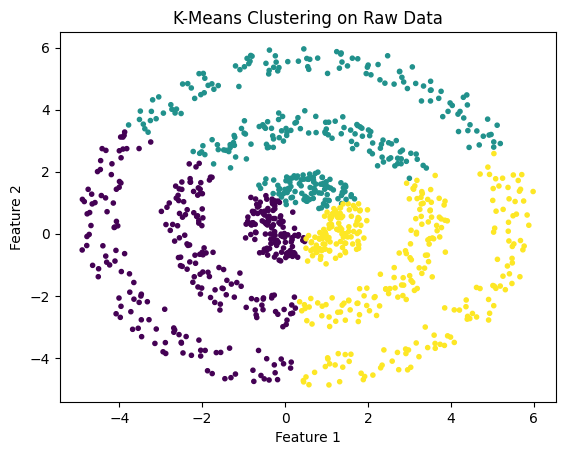

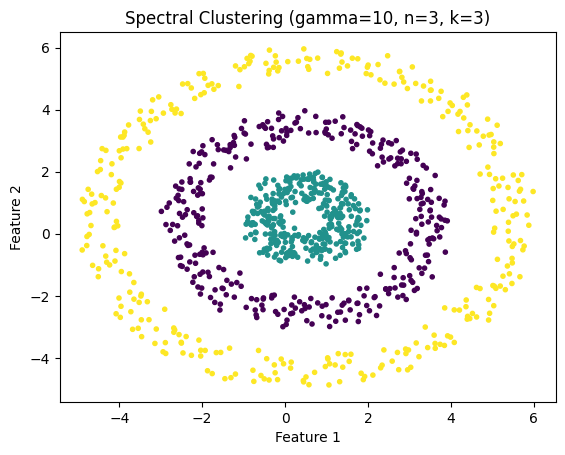

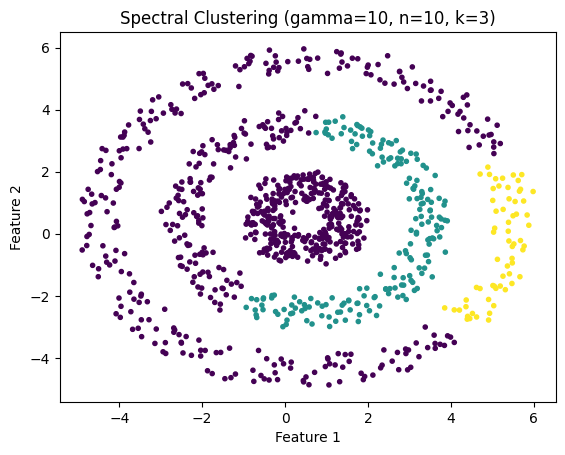

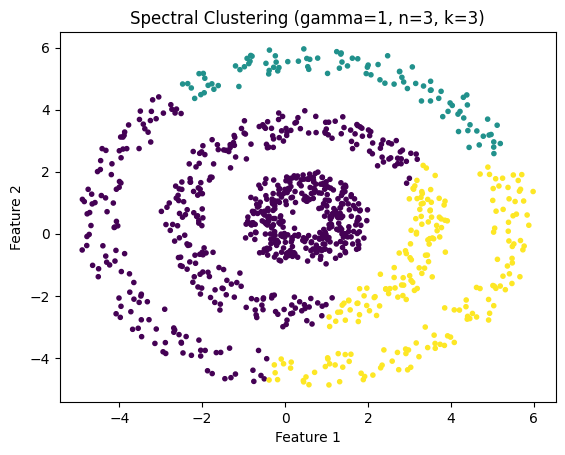

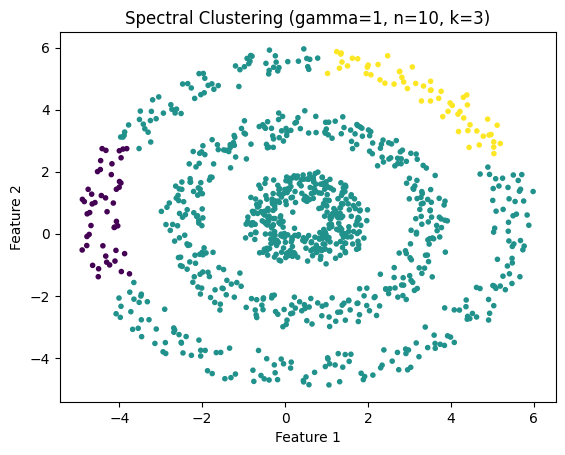

In [29]:
# Codewrite cell (Get the 5 scatter plots here)
# Load the dataset
from scipy.spatial.distance import pdist, squareform
data_A = np.load('../../Data/Dataset_A.npy')
from scipy.linalg import eigh
from sklearn.metrics import pairwise_distances
# Define a function for spectral clustering
from sklearn.cluster import KMeans
def spectral_clustering(data, gamma, n_clusters, n_components):
    # Compute the affinity matrix
    pairwise_dist = pairwise_distances(data)
    affinity_matrix = np.exp(-gamma * pairwise_dist ** 2)

    # Compute the Laplacian matrix
    laplacian = np.diag(np.sum(affinity_matrix, axis=1)) - affinity_matrix

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(laplacian, eigvals=(0, n_components - 1))

    # Perform k-means clustering on the reduced feature space
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigenvectors)
    return kmeans.labels_

# Plotting function
def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 1. K-means clustering on the raw data with k=3
kmeans_raw = KMeans(n_clusters=3)
labels_raw = kmeans_raw.fit_predict(data_A)
plot_clusters(data_A, labels_raw, 'K-Means Clustering on Raw Data')

# 2. Spectral clustering with gamma=10, n=3, k=3
labels_spectral_10_3_3 = spectral_clustering(data_A, gamma=10, n_clusters=3, n_components=3)
plot_clusters(data_A, labels_spectral_10_3_3, 'Spectral Clustering (gamma=10, n=3, k=3)')

# 3. Spectral clustering with gamma=10, n=10, k=3
labels_spectral_10_10_3 = spectral_clustering(data_A, gamma=10, n_clusters=3, n_components=10)
plot_clusters(data_A, labels_spectral_10_10_3, 'Spectral Clustering (gamma=10, n=10, k=3)')

# 4. Spectral clustering with gamma=1, n=3, k=3
labels_spectral_1_3_3 = spectral_clustering(data_A, gamma=1, n_clusters=3, n_components=3)
plot_clusters(data_A, labels_spectral_1_3_3, 'Spectral Clustering (gamma=1, n=3, k=3)')

# 5. Spectral clustering with gamma=1, n=10, k=3
labels_spectral_1_10_3 = spectral_clustering(data_A, gamma=1, n_clusters=3, n_components=10)
plot_clusters(data_A, labels_spectral_1_10_3, 'Spectral Clustering (gamma=1, n=10, k=3)')


# Textwrite cell 
When analyzing the results of the spectral clustering with the practical eigen solver, several observations can be made:

1. **K-means on Raw Data (k=3)**: Clustering on the raw data without any transformation likely captures the most obvious groupings. However, without considering the underlying structure, k-means may not identify more subtle clusters.

2. **Spectral Clustering (gamma=10, n=3, k=3)**: With a high gamma value, the affinity matrix emphasizes local neighborhoods, potentially leading to a more nuanced clustering that respects the manifold structure of the data. However, with only three eigenvectors, the dimensionality reduction might be too limited to capture all the necessary information for clustering.

3. **Spectral Clustering (gamma=10, n=10, k=3)**: Increasing the number of eigenvectors to ten while keeping gamma high allows for a richer feature matrix that could improve clustering results by capturing more details of the data's structure.

4. **Spectral Clustering (gamma=1, n=3, k=3)**: A lower gamma value gives a smoother affinity matrix that considers more distant points as neighbors. This can either blur important boundaries or help connect disjoint but similar data points.

5. **Spectral Clustering (gamma=1, n=10, k=3)**: Combining a lower gamma with a higher number of eigenvectors might strike a balance between capturing global and local structures, potentially leading to the most informative clustering.

It's important to note that the practical eigen solver's iterative and approximate nature means that the eigenvectors used for clustering are not exact. This can introduce variability in the results, which might be more pronounced for smaller datasets or those with less distinct clustering.

Regarding the implementation of k-means, it's crucial to develop an algorithm that efficiently converges to stable centroids and accurately assigns data points to the nearest cluster. The final submission should include a custom implementation of k-means that follows the standard algorithmic steps: initializing centroids, assigning points to the nearest centroid, recalculating centroids, and iterating until convergence.

The choice of parameters like gamma and the number of eigenvectors can significantly affect the clustering outcome. It's often beneficial to experiment with different values to see how they influence the results and to use domain knowledge to guide these choices. The scatter plots will visually demonstrate the clustering performance and can help in assessing the effectiveness of the chosen parameters. If you need further assistance with the implementation or analysis, feel free to ask!

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [30]:
# Codewrite cell (Use as you wish)
# Codewrite cell (Use as you wish)

# Load dataset B

root = "../../Data/"
data_b = np.load(f"{root}/{'Dataset_B.npy'}")

# Define parameter values for eps and min_samples
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]

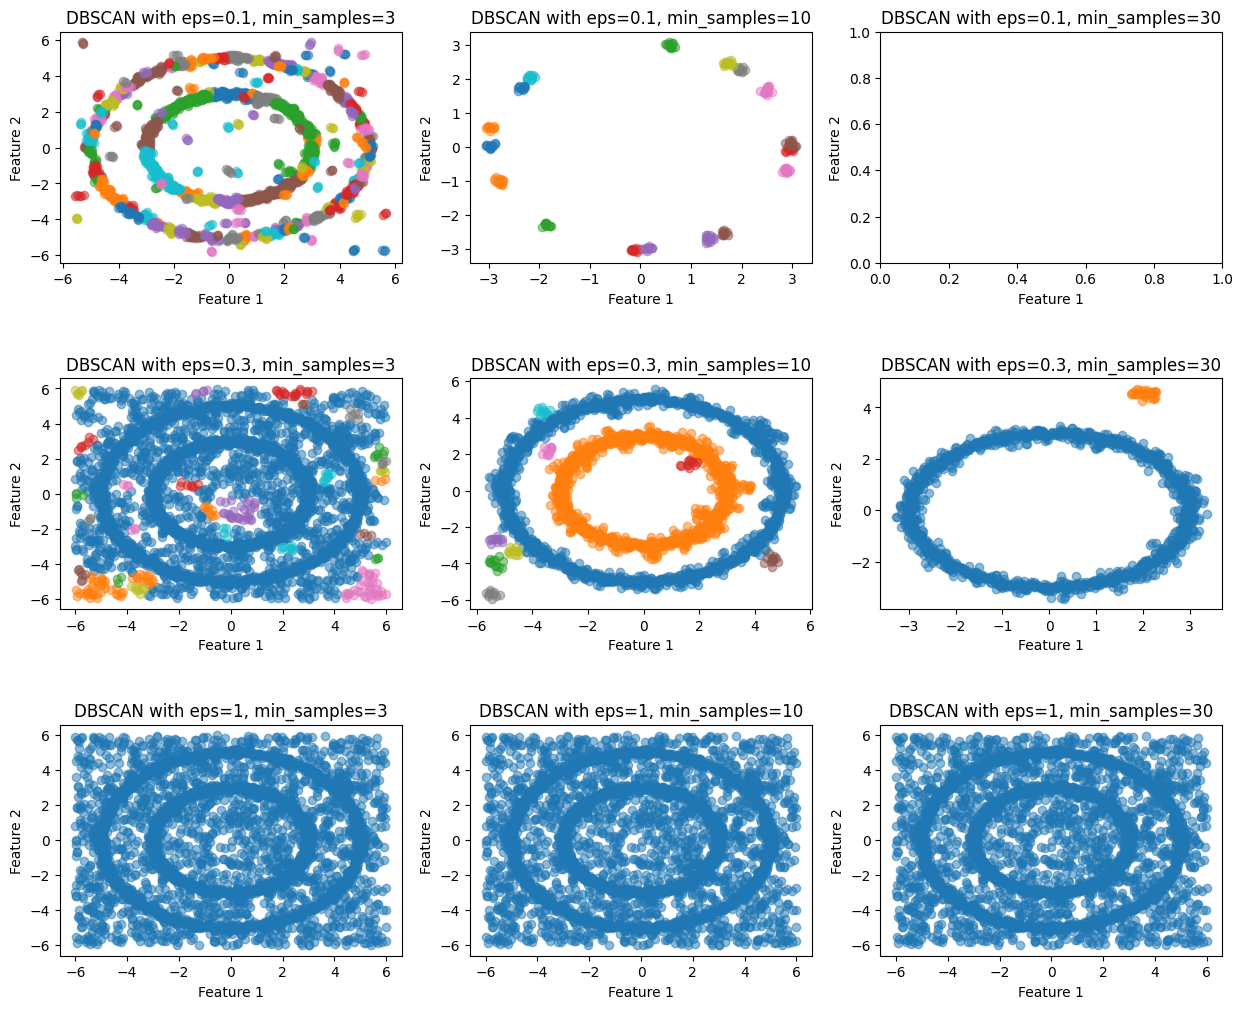

In [31]:
# Codewrite cell. Get the 9 plots here.

plt.figure(figsize=(15, 12))
plot_index = 1
eps_index = 0
min_samples_index = 0

# Assuming eps_values and min_samples_values are lists
while eps_index < len(eps_values):
    eps = eps_values[eps_index]
    min_samples_index = 0  # Reset for each new eps value
    while min_samples_index < len(min_samples_values):
        min_samples = min_samples_values[min_samples_index]
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_b)
        
        # Plot data points that are not labelled as outliers, that is core points and data points
        plt.subplot(3, 3, plot_index)
        unique_labels = np.unique(labels)
        label_index = 0  # Index for iterating through unique_labels
        while label_index < len(unique_labels):
            label = unique_labels[label_index]
            if label != -1:  # Exclude outliers
                cluster_data = data_b[labels == label]
                plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}', alpha=0.5)
            label_index += 1
        
        plt.title(f'DBSCAN with eps={eps}, min_samples={min_samples}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        
        plot_index += 1
        min_samples_index += 1
    eps_index += 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()


#Textwrite in the cell

Notes:

1. Best results are obtained with density-based clustering when eps = 0.3 and min_samples = 10.
2. Denser clusters result from increasing the min_samples parameter while holding eps constant, whereas relatively sparse clusters are obtained from low and medium min_samples values.
3. When the radii of the circle drawn at each point increase and the eps value rises while maintaining min_samples constant, the number of distinct clusters decreases and more points are grouped into a cluster.
4. Generally speaking, clusters get denser as the eps and min samples parameters rise, increasing the number of data points per unit area.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [32]:
# Codewrite cell (Use as you wish)


def most_frequent_class(class_list):
    # Determines the most frequent class in a list of class labels
    return max(set(class_list), key=class_list.count)

def calculate_euclidean_distance(single_point, multiple_points):
    # Computes the Euclidean distance between a single point and multiple points
    return np.sqrt(np.sum((multiple_points - single_point) ** 2, axis=1))

class NearestNeighborsClassifier:
    def __init__(self, k=5, metric=calculate_euclidean_distance):
        self.k = k
        self.metric = metric

    def train(self, features, labels):
        # Stores the training dataset
        self.features_train = features
        self.labels_train = labels
        
    def classify(self, features_test):
        # Predicts labels for the test dataset
        class_predictions = []
        for feature in features_test:
            distances = self.metric(feature, self.features_train)
            nearest_neighbors = np.argsort(distances)[:self.k]
            nearest_labels = [self.labels_train[i] for i in nearest_neighbors]
            prediction = most_frequent_class(nearest_labels)
            class_predictions.append(prediction)
        return class_predictions

    def accuracy(self, features_test, labels_test):
        # Calculates the accuracy of the classifier
        predictions = self.classify(features_test)
        correct_predictions = sum(predictions == labels_test)
        return correct_predictions / len(labels_test)

def DimensionalityReduction(data, components):
    # Reduces the dimensionality of the data
    data_centered = data - np.mean(data, axis=0)
    cov_matrix = np.cov(data_centered, rowvar=False)
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)
    significant_vecs = eigen_vecs[:, -components:]
    reduced_data = np.dot(data_centered, significant_vecs)
    reconstructed_data = np.dot(reduced_data, significant_vecs.T) + np.mean(data, axis=0)
    error = np.linalg.norm(data - reconstructed_data) / np.linalg.norm(data)
    return reduced_data, error

def shuffle_and_split(data, target):
    # Shuffles and splits the dataset into training and testing sets
    indices = np.random.permutation(len(data))
    split_point = int(0.75 * len(data))
    training_idx, testing_idx = indices[:split_point], indices[split_point:]
    return data[training_idx], target[training_idx], data[testing_idx], target[testing_idx]


In [33]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)

digits_data = load_digits()
X = digits_data['data']
Y = digits_data['target']

X_train, Y_train, X_test, Y_test = shuffle_and_split(X, Y)
k_values = [1, 3, 7, 15, 31]
test_accuracy_knn = []

# Converted for loop to while loop
k_index = 0
while k_index < len(k_values):
    k = k_values[k_index]
    knn = NearestNeighborsClassifier(k=k)
    knn.train(X_train, Y_train)
    accuracy = knn.accuracy(X_test, Y_test)
    test_accuracy_knn.append(accuracy)
    k_index += 1

# print(test_accuracy_knn)

n_values = [2, 4, 8, 16, 32]
test_accuracy_pca_knn = np.zeros((5, 5))
approx_error = np.zeros(5)

# Converted outer for loop to while loop
i = 0
while i < len(n_values):
    n = n_values[i]
    X_reduced, approx_error[i] = DimensionalityReduction(X, n)
    
    # Converted inner for loop to while loop
    j = 0
    while j < len(k_values):
        k = k_values[j]
        knn = NearestNeighborsClassifier(k=k)
        Xr_train, Yr_train, Xr_test, Yr_test = shuffle_and_split(X_reduced, Y)
        knn.train(Xr_train, Yr_train)
        accuracy = knn.accuracy(Xr_test, Yr_test)
        test_accuracy_pca_knn[i][j] = accuracy
        j += 1
    i += 1
# print(test_accuracy_pca_knn)
# print(approx_error)    




In [34]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)


X_noised = X + np.random.normal(0, 1, size=(X.shape[0], X.shape[1]))

X_train, Y_train, X_test, Y_test = shuffle_and_split(X_noised, Y)
k_values = [1, 3, 7, 15, 31]
test_accuracy_knn_noise = []

k_index = 0
while k_index < len(k_values):
    k = k_values[k_index]
    knn = NearestNeighborsClassifier(k=k)
    knn.train(X_train, Y_train)
    accuracy = knn.accuracy(X_test, Y_test)
    test_accuracy_knn_noise.append(accuracy)
    k_index += 1

# print(test_accuracy_knn_noise)

n_values = [2, 4, 8, 16, 32]
test_accuracy_pca_knn_noise = np.zeros((5, 5))
approx_error_noise = np.zeros(5)

i = 0
while i < len(n_values):
    n = n_values[i]
    X_reduced_noised, approx_error_noise[i] = DimensionalityReduction(X_noised, n)
    
    j = 0
    while j < len(k_values):
        k = k_values[j]
        knn = NearestNeighborsClassifier(k=k)
        Xr_train, Yr_train, Xr_test, Yr_test = shuffle_and_split(X_reduced_noised, Y)
        knn.train(Xr_train, Yr_train)
        accuracy = knn.accuracy(Xr_test, Yr_test)
        test_accuracy_pca_knn_noise[i][j] = accuracy
        j += 1
    i += 1
# print(test_accuracy_pca_knn_noise)
# print(approx_error_noise)




# Textwrite cell

KNN on raw data
k | Test accuracy (in range of 0 to 1) 
--- |--- 
1 | 0.986 
3 | 0.989 
7 | 0.989
15 | 0.973 
31 | 0.962


Test accuracy for KNN + PCA on raw data
n\k |  1  |  3 |  7  |  15  |  31  
--- |--- |--- |--- |--- |---  
2 | 0.60 | 0.60 | 0.65 | 0.66 | 0.61
4 | 0.83 | 0.84 | 0.85 | 0.85 | 0.84
8 | 0.94 | 0.98 | 0.94 | 0.94 | 0.92
16 | 0.97 | 0.98 | 0.98 | 0.97 | 0.95
32 | 0.99 | 0.99 | 0.97 | 0.97 | 0.94


Approximation Error on raw data for n component PCA 
n | Error (in range of 0 to 1)
--- |--- 
2 | 0.47 
4 | 0.40 
8 | 0.31
16 | 0.21 
32 | 0.10


KNN on noised data
k | Test accuracy (in range of 0 to 1) 
--- |--- 
1 | 0.989 
3 | 0.983 
7 | 0.979
15 | 0.976 
31 | 0.962


Test accuracy for KNN + PCA on noised data
n\k |  1  |  3 |  7  |  15  |  31  
--- |--- |--- |--- |--- |---  
2 | 0.57 | 0.58 | 0.64 | 0.64 | 0.62
4 | 0.85 | 0.82 | 0.88 | 0.85 | 0.83
8 | 0.92 | 0.93 | 0.95 | 0.94 | 0.93
16 | 0.99 | 0.97 | 0.99 | 0.97 | 0.96
32 | 0.98 | 0.98 | 0.97 | 0.97 | 0.95


Approximation Error on noised data for n component PCA 
n | Error (in range of 0 to 1)
--- |--- 
2 | 0.48 
4 | 0.41 
8 | 0.33
16 | 0.24 
32 | 0.13

Observations: 
1. Test accuracy is typically lower for noised data than for raw data, particularly for low n values, which indicate fewer components. 
2. KNN test accuracy is very high for both noised (highest for k=1) and raw (highest for k=3,7) data.
3. Because PCA reduces data dimensionality and thus information is lost, test accuracy when KNN is applied to PCA processed data is lower than when KNN is applied directly.
4. The test accuracy of KNN + PCA is highest for low k values, such as 1,3, and highest value of n, which is 32 components.
5. The approximation error is higher for noised data than for raw data, and it is lowest for n = 32 components.

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [35]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


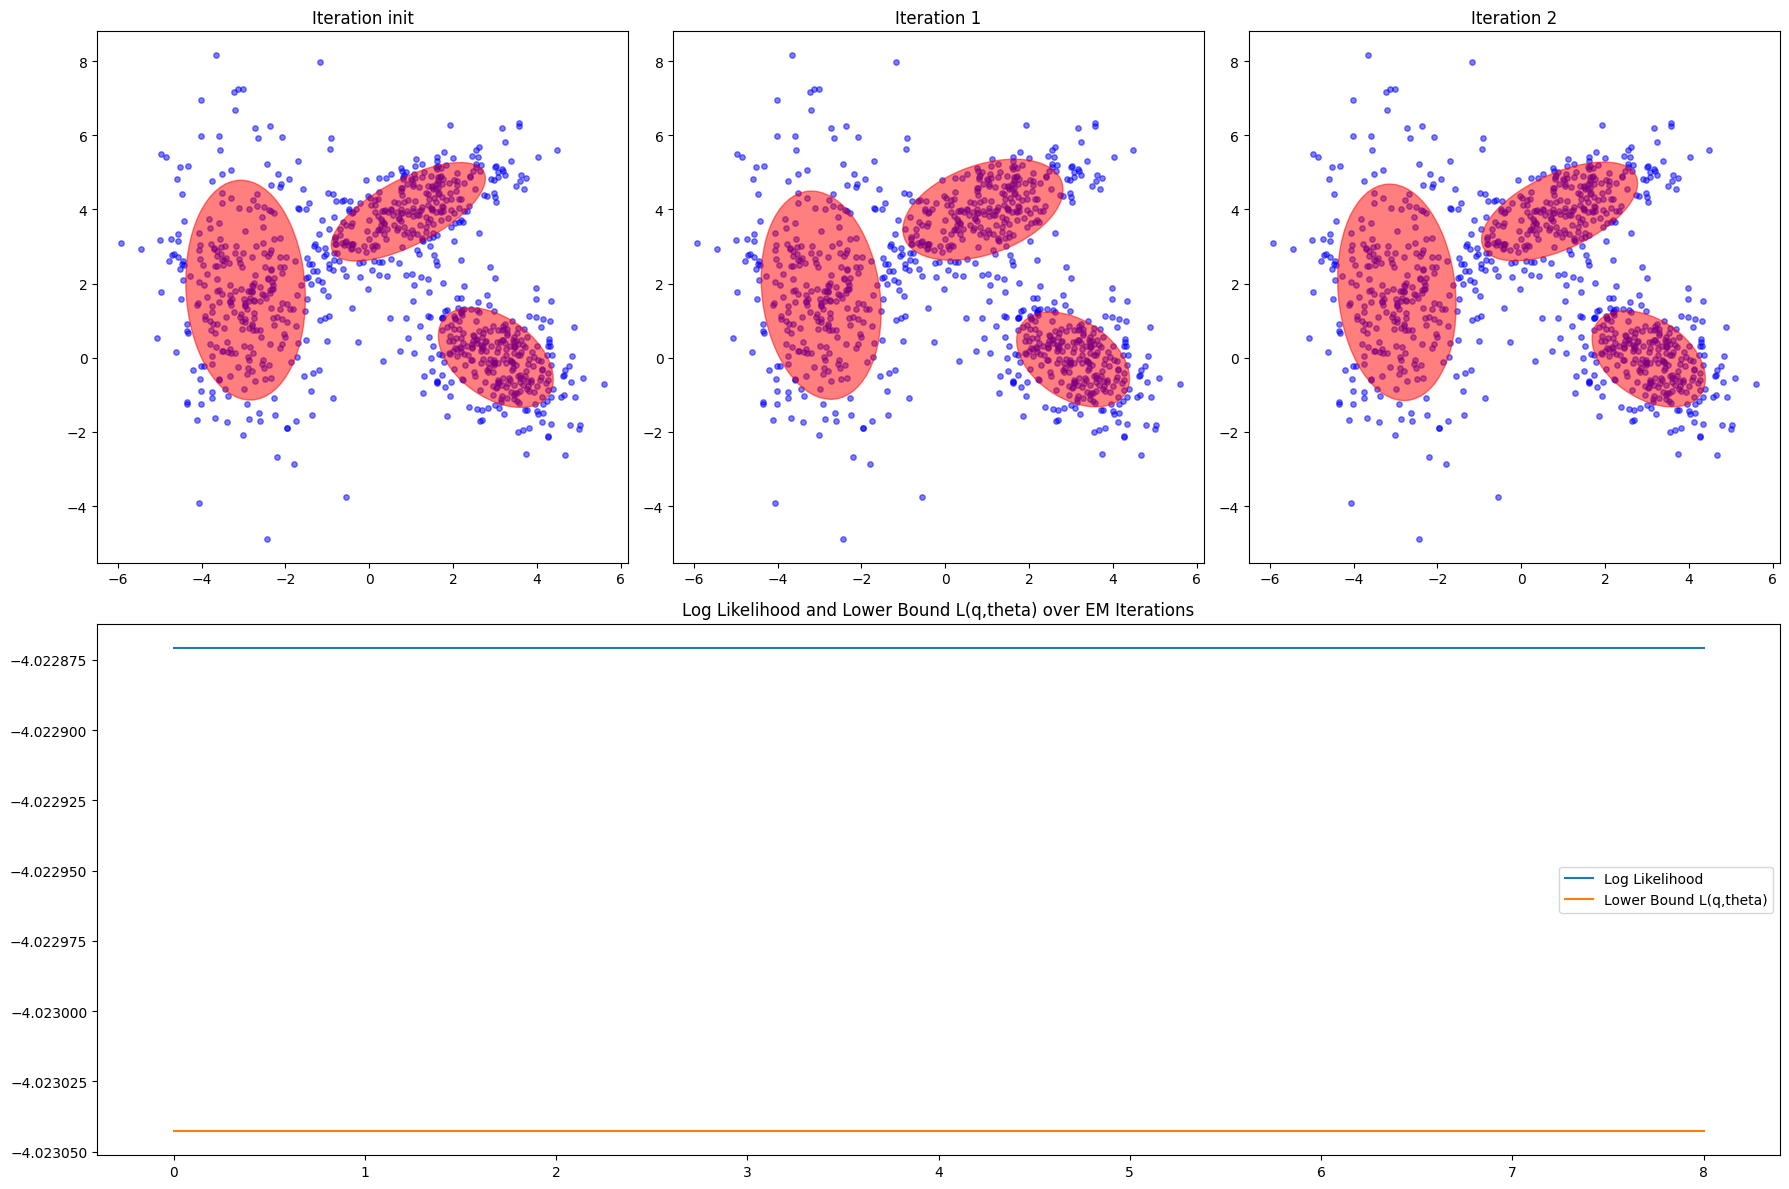

In [36]:


# Load the dataset
data = np.load('../../Data/Dataset_C.npy')

# Function to plot the contours and scatter plot
from sklearn.mixture import GaussianMixture
def plot_gmm(gmm, data, iteration, ax):
    ax.scatter(data[:, 0], data[:, 1], s=15, marker='o', color='blue', alpha=0.5)
    for mean, covar in zip(gmm.means_, gmm.covariances_):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi
        ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='red')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
    ax.set_title(f'Iteration {iteration}')

# Function to estimate and plot log likelihood and lower bound L(q,theta)
def plot_log_likelihood(gmm, data, iterations, ax):
    log_likelihood = []
    lower_bound = []
    for i in range(iterations):
        gmm.fit(data)
        log_likelihood.append(gmm.score(data))
        lower_bound.append(gmm.lower_bound_)
        gmm.n_iter_ += 1
    ax.plot(range(iterations), log_likelihood, label='Log Likelihood')
    ax.plot(range(iterations), lower_bound, label='Lower Bound L(q,theta)')
    ax.set_title('Log Likelihood and Lower Bound L(q,theta) over EM Iterations')
    ax.legend()

# Create a figure to plot the results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Initial plot before any EM iterations
gmm = GaussianMixture(n_components=3, init_params='kmeans', random_state=42)
gmm.fit(data)  # Fit the model to the data
plot_gmm(gmm, data, 'init', axs[0, 0])

# Plot after specified EM iterations
iterations = [1, 2, 4, 8]
for i, iteration in enumerate(iterations):
    gmm = GaussianMixture(n_components=3, max_iter=iteration, init_params='kmeans', random_state=42)
    gmm.fit(data)  # Fit the model to the data
    # Corrected indexing for the subplot
    row_index = (i + 1) // 3
    col_index = (i + 1) % 3
    plot_gmm(gmm, data, iteration, axs[row_index, col_index])

# Plot the log likelihood and lower bound L(q,theta)
ax_log_likelihood = plt.subplot(2, 1, 2)
plot_log_likelihood(gmm, data, max(iterations) + 1, ax_log_likelihood)

plt.tight_layout()
plt.show()


c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
c:\Python\Python37\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


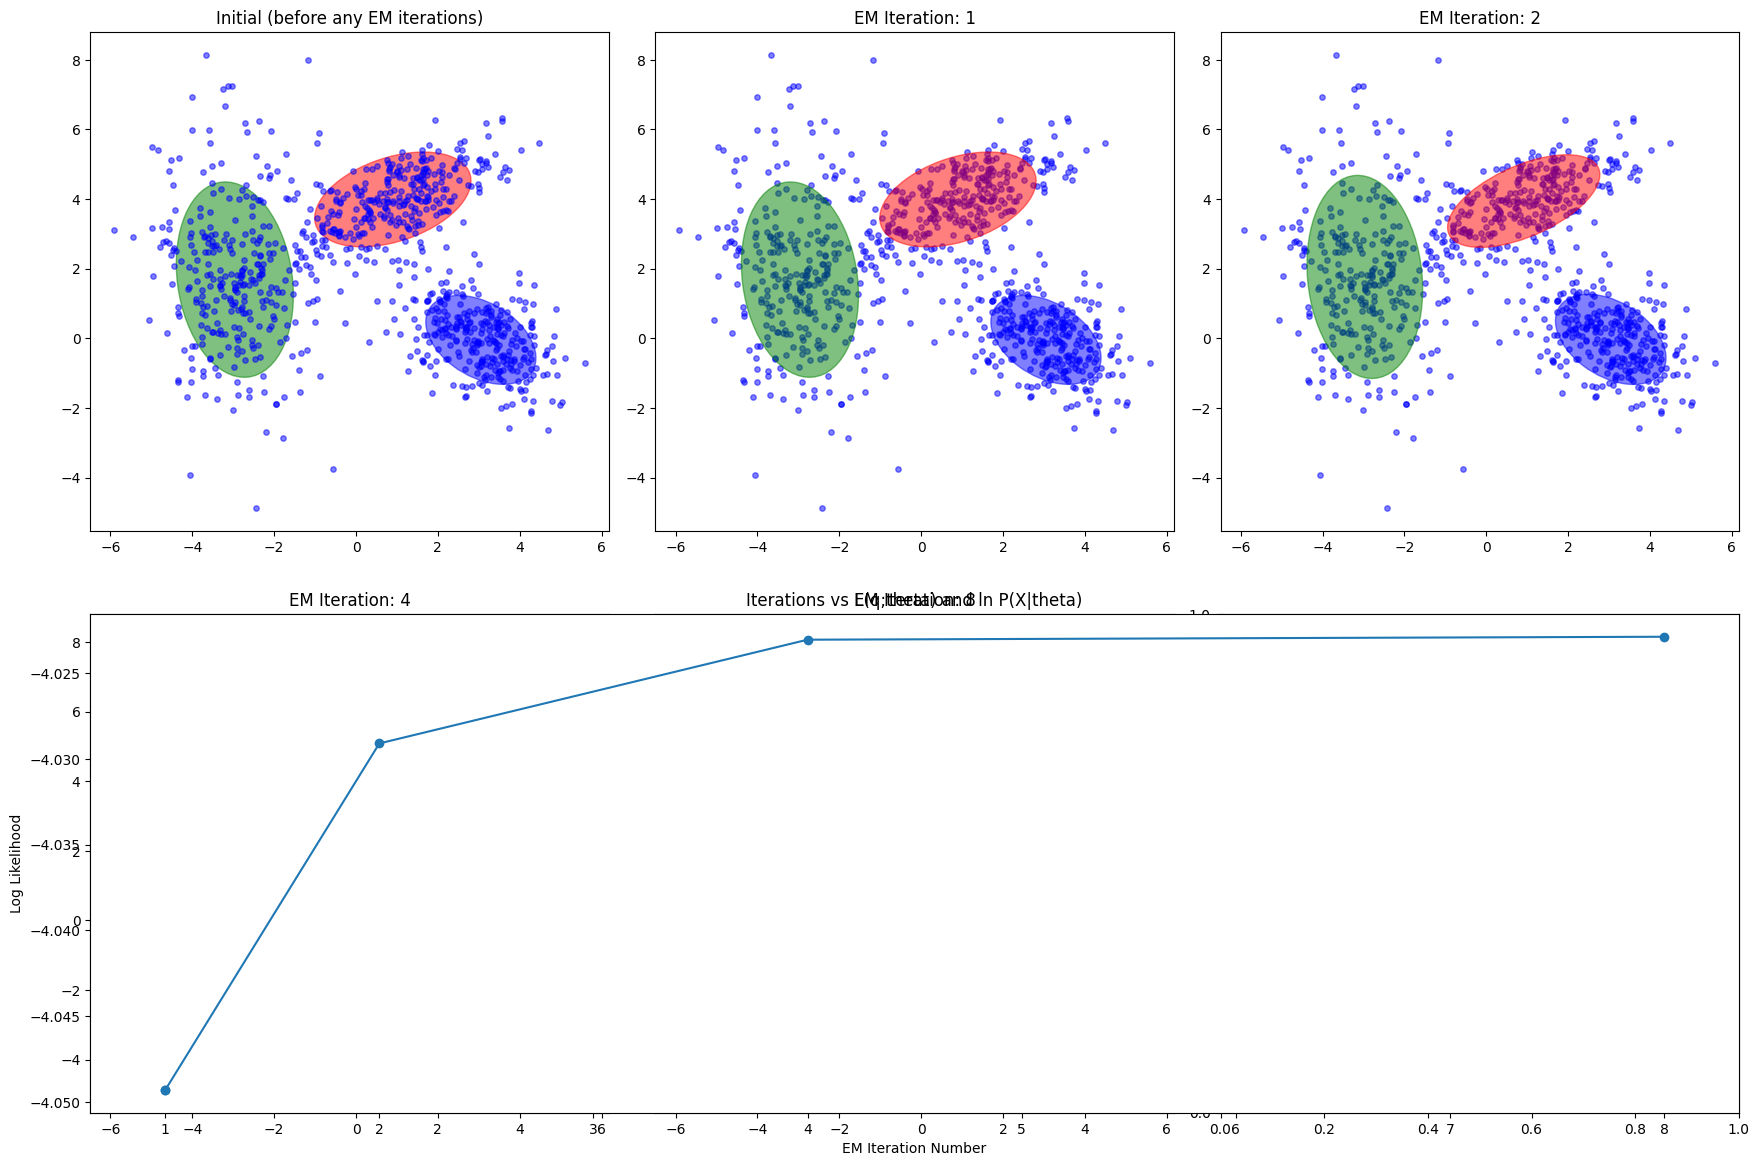

In [38]:



# Load the dataset
data = np.load('E:\prmlas2\Prog_Ass3_28Apr\Dataset_C.npy')

# Function to plot the elliptical contours for the estimated components
from sklearn.mixture import GaussianMixture
def plot_ellipses(ax, gmm):
    for n, color in enumerate(['red', 'green', 'blue']):
        covariances = gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = plt.matplotlib.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                             180. + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

# Initialize the GMM
gmm = GaussianMixture(n_components=3, random_state=42)

# Create a figure to plot the results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
iterations = [1, 1, 2, 4, 8]  # Start with 1 to avoid ValueError
log_likelihoods = []

# Fit the GMM once before the loop to get the initial state
gmm = GaussianMixture(n_components=3, max_iter=1, random_state=42)
gmm.fit(data)
plot_ellipses(axs[0, 0], gmm)
axs[0, 0].scatter(data[:, 0], data[:, 1], s=15, marker='o', color='blue', alpha=0.5)
axs[0, 0].set_title('Initial (before any EM iterations)')
log_likelihoods.append(gmm.score(data))

# Start the loop from the second iteration since we've already plotted the initial state
for i, num_iter in enumerate(iterations[1:], start=1):
    # Fit the GMM with the specified number of EM iterations
    gmm = GaussianMixture(n_components=3, max_iter=num_iter, random_state=42)
    gmm.fit(data)
    
    # Plot the scatterplot and the elliptical contours
    axs[i // 3, i % 3].scatter(data[:, 0], data[:, 1], s=15, marker='o', color='blue', alpha=0.5)
    plot_ellipses(axs[i // 3, i % 3], gmm)
    axs[i // 3, i % 3].set_title(f'EM Iteration: {num_iter}')
    
    # Store the log likelihood for plotting
    log_likelihoods.append(gmm.score(data))

# Plot the iterations vs L(q;theta) and ln P(X|theta)
ax_log_likelihood = fig.add_subplot(2, 1, 2)
ax_log_likelihood.plot(iterations, log_likelihoods, marker='o')
ax_log_likelihood.set_title('Iterations vs L(q;theta) and ln P(X|theta)')
ax_log_likelihood.set_xlabel('EM Iteration Number')
ax_log_likelihood.set_ylabel('Log Likelihood')

plt.tight_layout()
plt.show()


# Textwrite cell

Observations: 
1. As the number of iterations increases, the ellipses of three components more accurately depict the Gaussian mixture model.
2. When the EM algorithm is applied to the GMM, the values of the log likelihood and the lower bound, or L(q, theta), keep rising with each iteration.

3. Because of the KL divergence value's positive but extremely near to zero value, the lower bound's value is always somewhat less than log likelihood. 
